In [18]:
!which python

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
/data/gpfs/assoc/parchmanlab/tfaske/anaconda3/envs/py36/bin/python


In [19]:
#!source activate py34
!source activate py36

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
/usr/bin/sh: line 0: source: activate: file not found


In [20]:
import sys

#sys.path.append('/home/faske/g/anaconda3/envs/py34/lib/python3.4/site-packages')
sys.path.append('/data/gpfs/assoc/parchmanlab/tfaske/anaconda3/envs/py36/lib/python3.6/site-packages')
sys.path.append("/data/gpfs/assoc/parchmanlab/tfaske/ipynb/include_utils")

import ipyparallel as ipp
import os, time
import include_utils as u
import pandas as pd
import numpy as np
import scipy as sp
import numbers
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.cm as cm
import matplotlib.colors as mcolors
#import vcf
from sklearn import preprocessing
from subprocess import Popen, PIPE, call, check_output
import seaborn as sns
from IPython.display import FileLink
import urllib.request as urllib2
import dill
import traceback
from pandas import Series, DataFrame
import gzip
import warnings
warnings.filterwarnings('ignore',category=pd.io.pytables.PerformanceWarning)
%config InlineBackend.figure_format = 'retina'
from Bio import SeqIO
#import pysam
from collections import OrderedDict, namedtuple, Counter
import operator
import multiprocessing as mp
import shutil
import tempfile
#from ipyparallel import Client
import scandir
import glob
from Bio.SeqIO.QualityIO import FastqGeneralIterator
import pickle
import re
from itertools import chain
#import Levenshtein as lv

In [21]:
vcfutils = "vcfutils.pl"
vcftools = "vcftools"
bcftools = "bcftools"
bgzip = "bgzip"
tabix = "tabix"
java = "java"
plink = "plink --noweb"

In [22]:
root = '/data/gpfs/home/tfaske/d/rabbit/full/SNPcall'

In [23]:
cd $root

/data/gpfs/assoc/denovo/tfaske/rabbit/full/SNPcall


In [24]:
!mkdir filtering

In [25]:
!cp 'samtools1-9.samtools_ERNA.vcf.gz' filtering

In [26]:
analysis_dir = os.path.join(root,'filtering')

In [27]:
cd $analysis_dir

/data/gpfs/assoc/denovo/tfaske/rabbit/full/SNPcall/filtering


In [28]:
vcf_file = os.path.join(analysis_dir, "samtools1-9.samtools_ERNA.vcf.gz")
assert os.path.exists(vcf_file)
vcf_file

'/data/gpfs/home/tfaske/d/rabbit/full/SNPcall/filtering/samtools1-9.samtools_ERNA.vcf.gz'

# Filter first round 
    missing data, MAF, biallelic

In [29]:
!$vcftools --remove-indels \
--max-missing 0.7 \
--min-alleles 2 \
--max-alleles 2 \
--maf 0.01 \
--thin 50 \
--remove-filtered-all \
--recode \
--recode-INFO-all \
--gzvcf \
$vcf_file \
--out $'rabbit_miss70_thin50_MAF1'


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf /data/gpfs/home/tfaske/d/rabbit/full/SNPcall/filtering/samtools1-9.samtools_ERNA.vcf.gz
	--recode-INFO-all
	--maf 0.01
	--max-alleles 2
	--min-alleles 2
	--thin 50
	--max-missing 0.7
	--out rabbit_miss70_thin50_MAF1
	--recode
	--remove-filtered-all
	--remove-indels

Using zlib version: 1.2.11
After filtering, kept 599 out of 599 Individuals
Outputting VCF file...
After filtering, kept 71273 out of a possible 2043391 Sites
Run Time = 467.00 seconds


In [30]:
!$vcftools --remove-indels \
--max-missing 0.7 \
--min-alleles 2 \
--max-alleles 2 \
--maf 0.01 \
--thin 100 \
--remove-filtered-all \
--recode \
--recode-INFO-all \
--gzvcf \
$vcf_file \
--out $'rabbit_miss70_thin100_MAF1'


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf /data/gpfs/home/tfaske/d/rabbit/full/SNPcall/filtering/samtools1-9.samtools_ERNA.vcf.gz
	--recode-INFO-all
	--maf 0.01
	--max-alleles 2
	--min-alleles 2
	--thin 100
	--max-missing 0.7
	--out rabbit_miss70_thin100_MAF1
	--recode
	--remove-filtered-all
	--remove-indels

Using zlib version: 1.2.11
After filtering, kept 599 out of 599 Individuals
Outputting VCF file...
After filtering, kept 47028 out of a possible 2043391 Sites
Run Time = 407.00 seconds


In [31]:
!$vcftools --remove-indels \
--max-missing 0.7 \
--min-alleles 2 \
--max-alleles 2 \
--maf 0.02 \
--thin 100 \
--remove-filtered-all \
--recode \
--recode-INFO-all \
--gzvcf \
$vcf_file \
--out $'rabbit_miss70_thin100_MAF2'


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf /data/gpfs/home/tfaske/d/rabbit/full/SNPcall/filtering/samtools1-9.samtools_ERNA.vcf.gz
	--recode-INFO-all
	--maf 0.02
	--max-alleles 2
	--min-alleles 2
	--thin 100
	--max-missing 0.7
	--out rabbit_miss70_thin100_MAF2
	--recode
	--remove-filtered-all
	--remove-indels

Using zlib version: 1.2.11
After filtering, kept 599 out of 599 Individuals
Outputting VCF file...
After filtering, kept 43743 out of a possible 2043391 Sites
Run Time = 400.00 seconds


In [32]:
vcf_filtered = "%s.recode.vcf" % '/data/gpfs/home/tfaske/d/rabbit/full/SNPcall/filtering/rabbit_miss70_thin100_MAF2'
vcf_filtered_gz = "%s.gz" % vcf_filtered

In [33]:
!$bgzip -c $vcf_filtered > {vcf_filtered_gz}
!$tabix {vcf_filtered_gz}

# Remove bad_indv


In [34]:
!$vcftools --gzvcf $vcf_filtered_gz --out $vcf_filtered_gz --missing-indv


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf /data/gpfs/home/tfaske/d/rabbit/full/SNPcall/filtering/rabbit_miss70_thin100_MAF2.recode.vcf.gz
	--missing-indv
	--out /data/gpfs/home/tfaske/d/rabbit/full/SNPcall/filtering/rabbit_miss70_thin100_MAF2.recode.vcf.gz

Using zlib version: 1.2.11
After filtering, kept 599 out of 599 Individuals
Outputting Individual Missingness
After filtering, kept 43743 out of a possible 43743 Sites
Run Time = 7.00 seconds


In [35]:
def get_imiss(filedir, prefix):
    imiss_file = !ls {filedir}/{prefix}.imiss
    imiss_df = pd.read_csv(imiss_file[0], sep="\t")
    imiss_df.index = imiss_df.INDV
    return imiss_df

In [36]:
imiss_df = get_imiss(analysis_dir,'rabbit_miss70_thin100_MAF2.recode.vcf.gz')
imiss_df.head()

,INDV,N_DATA,N_GENOTYPES_FILTERED,N_MISS,F_MISS
INDV,,,,,
EN_AH_10,EN_AH_10,43743,0,3799,0.086848
EN_AH_11,EN_AH_11,43743,0,3099,0.070846
EN_AH_12,EN_AH_12,43743,0,3038,0.069451
EN_AH_13,EN_AH_13,43743,0,2648,0.060535
EN_AH_14,EN_AH_14,43743,0,4565,0.104360


In [37]:
imiss_df.F_MISS.describe()

count    599.000000
mean       0.114915
std        0.108088
min        0.031113
25%        0.057335
50%        0.076469
75%        0.120500
max        0.982077
Name: F_MISS, dtype: float64

In [38]:
len(imiss_df),len(imiss_df[imiss_df.F_MISS >= .4]),len(imiss_df[imiss_df.F_MISS >= .5]), len(imiss_df[imiss_df.F_MISS >= .3])


(599, 14, 11, 36)

In [39]:
bad_indv = imiss_df.INDV[imiss_df.F_MISS >= .4]

In [40]:
with open(os.path.join(analysis_dir, "bad_indv.txt"), "w") as o:
    o.write("INDV\n")
    for elem in bad_indv.index:
        o.write("%s\n" % elem)

In [41]:
!$vcftools --gzvcf $vcf_filtered_gz \
--remove-indels  \
--remove-filtered-all \
--recode \
--recode-INFO-all \
--remove {os.path.join(analysis_dir, "bad_indv.txt")} \
--out {os.path.join(analysis_dir, "snps_indv_removed")}


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf /data/gpfs/home/tfaske/d/rabbit/full/SNPcall/filtering/rabbit_miss70_thin100_MAF2.recode.vcf.gz
	--remove /data/gpfs/home/tfaske/d/rabbit/full/SNPcall/filtering/bad_indv.txt
	--recode-INFO-all
	--out /data/gpfs/home/tfaske/d/rabbit/full/SNPcall/filtering/snps_indv_removed
	--recode
	--remove-filtered-all
	--remove-indels

Using zlib version: 1.2.11
Excluding individuals in 'exclude' list
After filtering, kept 585 out of 599 Individuals
Outputting VCF file...
After filtering, kept 43743 out of a possible 43743 Sites
Run Time = 100.00 seconds


In [42]:
vcf_bad_remove = os.path.join(analysis_dir, "snps_indv_removed.recode.vcf")
vcf_bad_remove_gz = vcf_bad_remove + ".gz"
!$bgzip -c {vcf_bad_remove} > {vcf_bad_remove_gz}
!$tabix {vcf_bad_remove_gz}

# Filter snps further 
this needs to be done after removing individuals


In [43]:
def get_vcf_stats(vcf_gz):
    
    stats = ['depth',
            'site-depth',
            'site-mean-depth',
            'site-quality',
            'missing-site',
            'freq',
            'counts',
            'hardy',
            'het']
    
    for stat in stats:
        !$vcftools --gzvcf $vcf_gz \
        --out $vcf_gz \
        {"--%s" % stat} 

In [44]:
get_vcf_stats(vcf_bad_remove_gz)


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf /data/gpfs/home/tfaske/d/rabbit/full/SNPcall/filtering/snps_indv_removed.recode.vcf.gz
	--depth
	--out /data/gpfs/home/tfaske/d/rabbit/full/SNPcall/filtering/snps_indv_removed.recode.vcf.gz

Using zlib version: 1.2.11
After filtering, kept 585 out of 585 Individuals
Outputting Mean Depth by Individual
After filtering, kept 43743 out of a possible 43743 Sites
Run Time = 8.00 seconds

VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf /data/gpfs/home/tfaske/d/rabbit/full/SNPcall/filtering/snps_indv_removed.recode.vcf.gz
	--out /data/gpfs/home/tfaske/d/rabbit/full/SNPcall/filtering/snps_indv_removed.recode.vcf.gz
	--site-depth

Using zlib version: 1.2.11
After filtering, kept 585 out of 585 Individuals
Outputting Depth for Each Site
After filtering, kept 43743 out of a possible 43743 Sites
Run Time = 8.00 seconds

VCFtools - 0.1.16
(C) Adam Auton 

After filtering, kept 585 out of 585 Individuals
Outputting Individual Heterozygosity
After filtering, kept 43743 out of a possible 43743 Sites
Run Time = 8.00 seconds


In [45]:
#pd.set_option('display.max_columns', 100)

def get_MAF(row):
    try:
        return np.min([row.A1_freq, row.A2_freq])
    except:
        print(row)
        
def get_correction(n):
    #for finite sample size
    return (2*n)/(2*n-1)

def calculate_Fis(vals):
    try:
        data = [float(x) for x in vals.split("/")]
        assert len(data) == 3
        num_individuals = np.sum(data)
        total_alleles = 2*num_individuals
        a1_count = 2*data[0]
        a2_count = 2*data[2]
        het_count = data[1]
        a1_count += het_count
        a2_count += het_count
        a1_freq = a1_count/total_alleles
        a2_freq = a2_count/total_alleles
        assert a1_freq + a2_freq == 1.0
        He = 2 * a1_freq * a2_freq * get_correction(num_individuals)
        Ho = het_count/num_individuals
        Fis = 1 - (Ho/He)
        return Fis
    except:
        return -9

def combine_vcf_stats(filedir, prefix):
    
    hardy_files = !ls {filedir}/{prefix}.hwe
    hardy = pd.read_csv(hardy_files[0], sep="\t")

    hardy.columns = ['CHROM', 'POS', 'OBS(HOM1/HET/HOM2)', 'E(HOM1/HET/HOM2)', 'ChiSq_HWE',
       'P_HWE', 'P_HET_DEFICIT', 'P_HET_EXCESS']
    hardy.index = hardy.apply(lambda x: "%s-%d" % (x.CHROM, x.POS), axis=1)
    
    loci_files = !ls {filedir}/{prefix}.l* | grep -v log
    loci_df = pd.concat([pd.read_csv(x, sep="\t", skiprows=0) for x in loci_files], axis=1)
    chrom_pos = loci_df.ix[:,0:2]
    
    frq_files = !ls {filedir}/{prefix}.frq* | grep -v count
    frq_data = []
    h = open(frq_files[0])
    header = h.readline().strip().split()
    for line in h:
        frq_data.append(line.strip().split('\t'))

    header = ['CHROM', 'POS', 'N_ALLELES', 'N_CHR', 'A1_FREQ', "A2_FREQ"]
    frq_df = pd.DataFrame(frq_data)
    print(frq_df.columns)
    #frq_df = frq_df.drop([6,7],axis=1)
    frq_df.columns = header
    frq_df.index = frq_df.apply(lambda x: "%s-%s" % (x.CHROM, x.POS), axis=1)
    
    loci_df = loci_df.drop(['CHROM','CHR','POS'], axis=1)
    loci_df = pd.concat([chrom_pos, loci_df], axis=1)
    loci_df.index = loci_df.apply(lambda x: "%s-%d" % (x.CHROM, x.POS), axis=1)
    
    loci_df = pd.concat([loci_df, frq_df, hardy], axis=1)
    loci_df["A1_allele"] = loci_df.apply(lambda row: row.A1_FREQ.split(":")[0], axis=1)
    loci_df["A2_allele"] = loci_df.apply(lambda row: row.A2_FREQ.split(":")[0], axis=1)
    
    loci_df["A1_freq"] = loci_df.apply(lambda row: float(row.A1_FREQ.split(":")[1]), axis=1)
    loci_df["A2_freq"] = loci_df.apply(lambda row: float(row.A2_FREQ.split(":")[1]), axis=1)
    
    loci_df['MAF'] = loci_df.apply(get_MAF, axis=1)
    loci_df = loci_df.drop(['CHROM', 'POS'], axis=1)
    
    loci_df['Fis'] = loci_df['OBS(HOM1/HET/HOM2)'].apply(calculate_Fis)
    
    return loci_df, frq_df, hardy

In [46]:
vcf_bad_remove_gz

'/data/gpfs/home/tfaske/d/rabbit/full/SNPcall/filtering/snps_indv_removed.recode.vcf.gz'

In [47]:
loci_df, frq_df, hardy = combine_vcf_stats(analysis_dir,'snps_indv_removed.recode.vcf.gz')

/data/gpfs/assoc/parchmanlab/tfaske/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:45: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
/data/gpfs/assoc/parchmanlab/tfaske/anaconda3/envs/py36/lib/python3.6/site-packages/pandas/core/indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)


RangeIndex(start=0, stop=6, step=1)


In [48]:
loci_out = os.path.join(analysis_dir,'loci_out.csv')
frq_out = os.path.join(analysis_dir,'frq_out.csv')
hardy_out = os.path.join(analysis_dir,'hardy_out.csv')

loci_df.to_csv(path_or_buf=loci_out)
frq_df.to_csv(path_or_buf=frq_out)
hardy.to_csv(path_or_buf=hardy_out)


In [49]:
loci_df.SUM_DEPTH.describe()

count    4.374300e+04
mean     1.735947e+04
std      1.285888e+05
min      9.020000e+02
25%      2.096000e+03
50%      3.124000e+03
75%      6.082500e+03
max      4.622381e+06
Name: SUM_DEPTH, dtype: float64

In [50]:
loci_df.QUAL.describe()

count    43743.000000
mean       953.295910
std        139.008338
min          3.973010
25%        999.000000
50%        999.000000
75%        999.000000
max        999.000000
Name: QUAL, dtype: float64

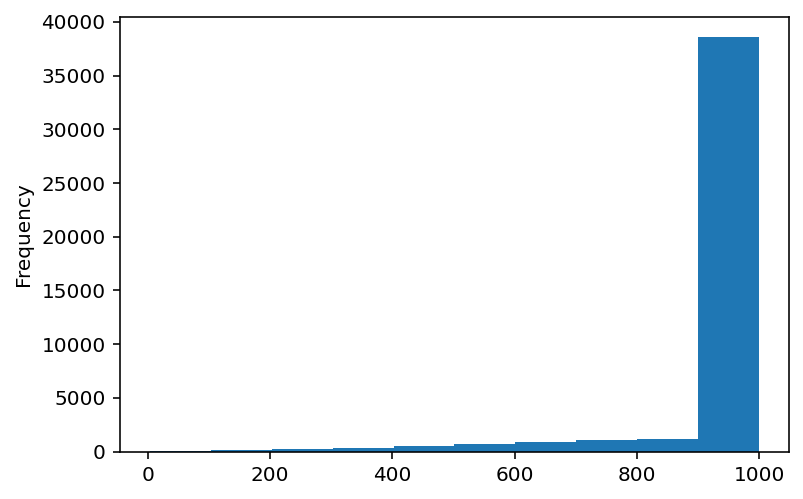

In [51]:
loci_df.QUAL.plot(kind="hist");

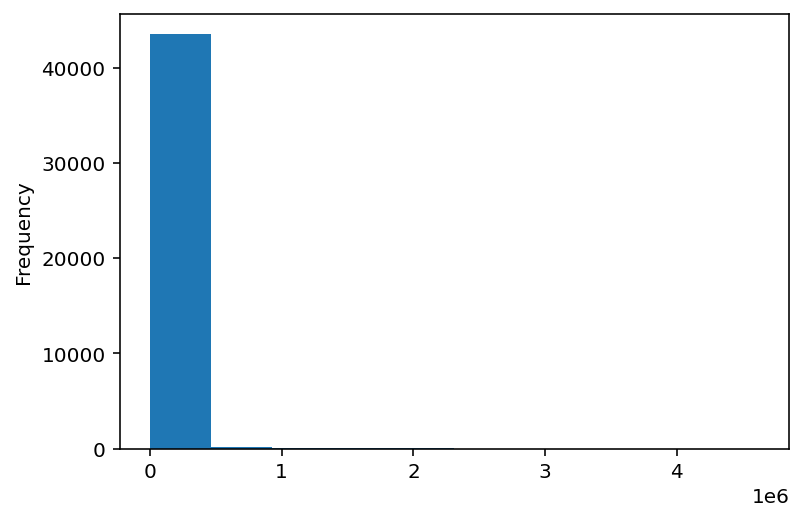

In [52]:
loci_df.SUM_DEPTH.plot(kind="hist");

In [53]:
len(loci_df[loci_df.Fis == -9])

0

In [55]:
len(loci_df[loci_df.SUM_DEPTH > 10000]),len(loci_df[loci_df.SUM_DEPTH >=1500])

(6560, 40975)

In [56]:
len(loci_df[loci_df.QUAL >= 10]) - len(loci_df[loci_df.QUAL >= 20])

9

In [57]:
len(loci_df[loci_df.QUAL <  999]), len(loci_df[loci_df.QUAL < 500]), len(loci_df[loci_df.QUAL < 200])

(6422, 1278, 190)

In [59]:
 len(loci_df[loci_df.Fis <= -0.5]), len(loci_df[loci_df.MAF < 0.02])

(1804, 369)

In [60]:
def filter_snps(df, imputed=False):
    if imputed:
        return df[(df.MAF >= 0.01) &  
                  (df.Fis > -0.5)]
    else:
        return df[(df.SUM_DEPTH >= 1500) & 
                  (df.SUM_DEPTH < 10000) & 
                  (df.QUAL >= 500) & 
                  (df.MAF >= 0.02) &  
                  (df.Fis > -0.5)]

In [61]:
loci_stage1 = filter_snps(loci_df)
loci_stage1.shape

(32566, 25)

In [62]:
with open(os.path.join(analysis_dir, "stage1_positions.txt"), "w") as o:
    for elem in loci_stage1.index:
        o.write("%s\n" % "\t".join(elem.split("-")))

In [63]:
!$vcftools --gzvcf $vcf_bad_remove_gz \
--remove-indels  \
--remove-filtered-all \
--recode \
--recode-INFO-all \
--positions {os.path.join(analysis_dir, "stage1_positions.txt")} \
--out {os.path.join(analysis_dir, "good_snps")}


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf /data/gpfs/home/tfaske/d/rabbit/full/SNPcall/filtering/snps_indv_removed.recode.vcf.gz
	--recode-INFO-all
	--out /data/gpfs/home/tfaske/d/rabbit/full/SNPcall/filtering/good_snps
	--positions /data/gpfs/home/tfaske/d/rabbit/full/SNPcall/filtering/stage1_positions.txt
	--recode
	--remove-filtered-all
	--remove-indels

Using zlib version: 1.2.11
After filtering, kept 585 out of 585 Individuals
Outputting VCF file...
After filtering, kept 32566 out of a possible 43743 Sites
Run Time = 75.00 seconds


In [64]:
snps = os.path.join(analysis_dir, "good_snps.recode.vcf")
snps_gz = snps + ".gz"
!$bgzip -c {snps} > {snps_gz}
!$tabix {snps_gz}

# Plink / chrom_map

In [65]:
chroms = sorted(set([x.split("-")[0] for x in loci_df.index]))
len(chroms) # number of unique contigs

43743

In [66]:
with open(os.path.join(analysis_dir, "chrom_map.txt"), "w") as o:
    for i, c in enumerate(chroms):
        o.write("%s\t%d\n" % (c, i))

In [67]:
def write_plink_files(vcf_gz):
    !$vcftools --gzvcf {vcf_gz} \
    --out {vcf_gz} \
    --plink \
    --chrom-map {os.path.join(analysis_dir, "chrom_map.txt")}

In [68]:
write_plink_files(snps_gz)


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf /data/gpfs/home/tfaske/d/rabbit/full/SNPcall/filtering/good_snps.recode.vcf.gz
	--chrom-map /data/gpfs/home/tfaske/d/rabbit/full/SNPcall/filtering/chrom_map.txt
	--out /data/gpfs/home/tfaske/d/rabbit/full/SNPcall/filtering/good_snps.recode.vcf.gz
	--plink

Using zlib version: 1.2.11
After filtering, kept 585 out of 585 Individuals
Writing PLINK PED and MAP files ... 
	Read 43744 chromosome mapping file entries.
Done.
After filtering, kept 32566 out of a possible 32566 Sites
Run Time = 10.00 seconds


# Make 012

In [69]:
f = os.path.join(analysis_dir, "good_snps.recode.vcf")
!$vcftools --gzvcf {f} \
--out {f} \
--012


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf /data/gpfs/home/tfaske/d/rabbit/full/SNPcall/filtering/good_snps.recode.vcf
	--012
	--out /data/gpfs/home/tfaske/d/rabbit/full/SNPcall/filtering/good_snps.recode.vcf

Using zlib version: 1.2.11
After filtering, kept 585 out of 585 Individuals
Writing 012 matrix files ... Done.
After filtering, kept 32566 out of a possible 32566 Sites
Run Time = 6.00 seconds


# Get coverage per individual

In [70]:
f = os.path.join(analysis_dir, "good_snps.recode.vcf")
!$vcftools --gzvcf {f} \
--out {f} \
--depth


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf /data/gpfs/home/tfaske/d/rabbit/full/SNPcall/filtering/good_snps.recode.vcf
	--depth
	--out /data/gpfs/home/tfaske/d/rabbit/full/SNPcall/filtering/good_snps.recode.vcf

Using zlib version: 1.2.11
After filtering, kept 585 out of 585 Individuals
Outputting Mean Depth by Individual
After filtering, kept 32566 out of a possible 32566 Sites
Run Time = 4.00 seconds


In [71]:
depth_file = os.path.join(analysis_dir, "good_snps.recode.vcf.idepth")
depth_df = pd.read_csv(depth_file, sep="\t")
depth_df.head()

,INDV,N_SITES,MEAN_DEPTH
0,EN_AH_10,32566,7.34020
1,EN_AH_11,32566,6.96754
2,EN_AH_12,32566,8.46048
3,EN_AH_13,32566,8.21148
4,EN_AH_14,32566,5.08423


In [72]:
depth_df.MEAN_DEPTH.describe()

count    585.000000
mean       6.025775
std        1.644360
min        1.374470
25%        4.911130
50%        6.301760
75%        7.219740
max        9.729290
Name: MEAN_DEPTH, dtype: float64

# Remove unnecessary files

In [73]:
!rm snps*

In [74]:
!rm rabbit*

In [75]:
!rm *vcf